<a href="https://colab.research.google.com/github/lp-0406/Employee-Salary-Prediction/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd

In [49]:
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/adult 3.csv")

In [50]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [51]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [52]:
data.shape

(48842, 15)

In [53]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [54]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [55]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-55-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [56]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [57]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-57-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [58]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [59]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [60]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [61]:
data.shape

(48811, 15)

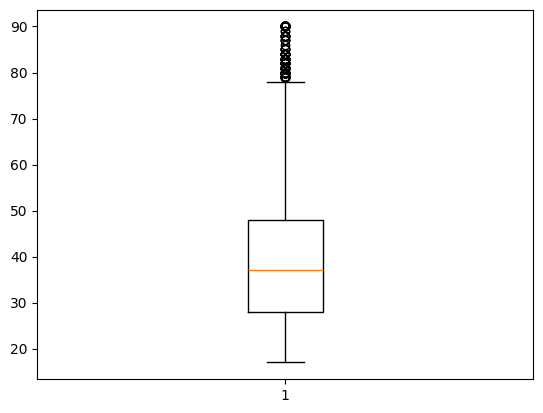

In [62]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [63]:
data=data[(data['age']<=75)&(data['age']>=17)]

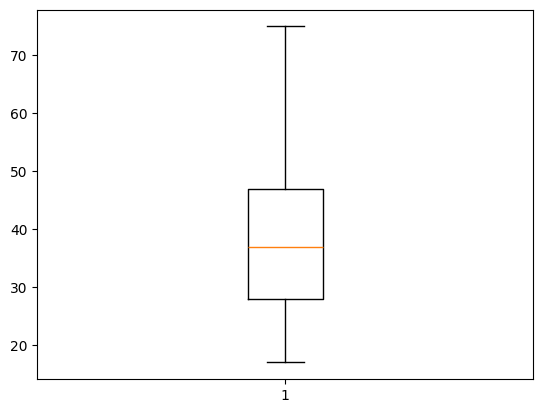

In [64]:
plt.boxplot(data['age'])
plt.show()

In [65]:
data.shape

(48438, 15)

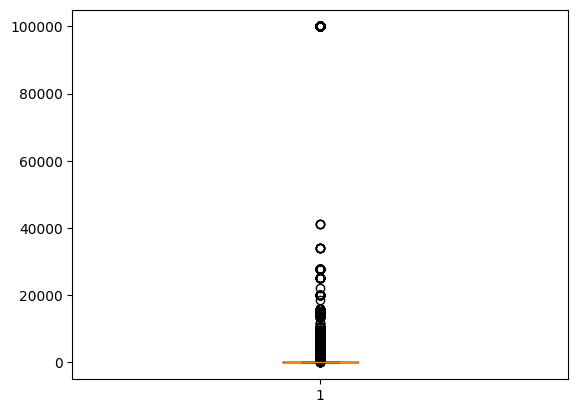

In [66]:
plt.boxplot(data['capital-gain'])
plt.show()

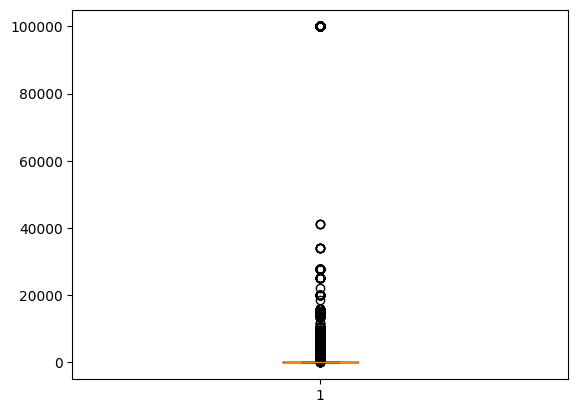

In [67]:
plt.boxplot(data['capital-gain'])
plt.show()

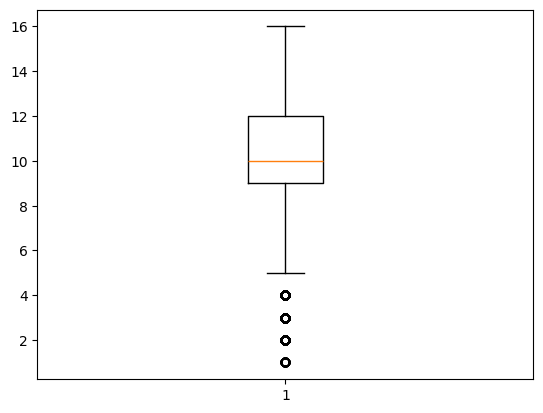

In [68]:
plt.boxplot(data['educational-num'])
plt.show()

In [69]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

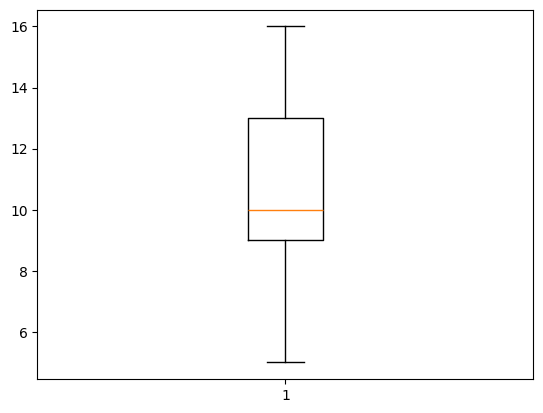

In [70]:
plt.boxplot(data['educational-num'])
plt.show()

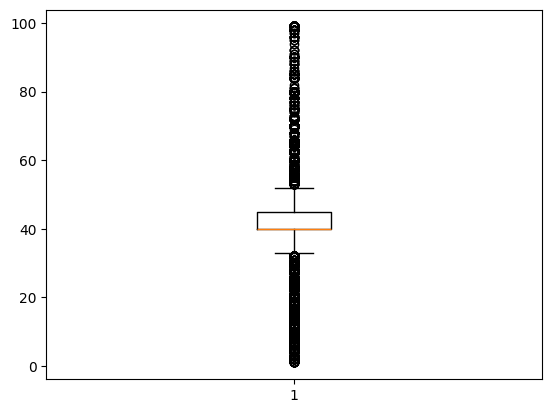

In [71]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [72]:
data.shape

(46720, 15)

In [73]:
data=data.drop(columns=['education']) #redundant features removal

In [74]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [75]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [76]:
from sklearn.preprocessing import LabelEncoder
import joblib

encoder_dict = {}

for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoder_dict[col] = le

# Save all encoders to a file
joblib.dump(encoder_dict, "preprocessors.pkl")


['preprocessors.pkl']

In [77]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [78]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8470
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.73      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.80      0.77      0.78      9344
weighted avg       0.84      0.85      0.84      9344

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

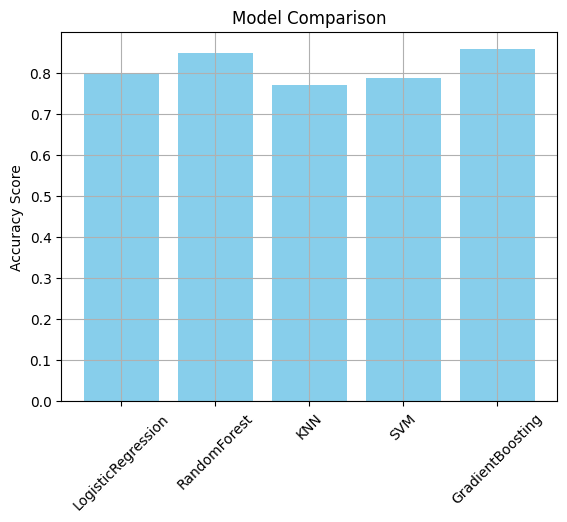

In [82]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
feature_names = X_train.columns.tolist()
joblib.dump((best_model, feature_names), "best_model.pkl")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7964
RandomForest: 0.8507
KNN: 0.7704
SVM: 0.7884
GradientBoosting: 0.8571

Best model: GradientBoosting with accuracy 0.8571


['best_model.pkl']

In [94]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model, expected_columns = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    input_df = input_df[expected_columns]
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_data = batch_data[expected_columns]
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py


In [86]:
!pip install streamlit pyngrok --quiet


In [95]:
!ngrok config add-authtoken 30GsMxrzqPdotuvuaKpurQ1isv4_7R65w2rZk7hoRZ2WGV3FE

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [96]:
import os
import threading

def run():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run)
thread.start()


In [97]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(f"✅ Streamlit app is live at: {public_url}")


✅ Streamlit app is live at: NgrokTunnel: "https://632ff285fcba.ngrok-free.app" -> "http://localhost:8501"
